In [1]:
# Import necessary libraries
import cdflib
import xarray as xr
import os
import urllib.request
import numpy as np
import pandas as pd
import datetime as dt
from tqdm import tqdm
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import math

import sys
import h5py
import dask
from scipy.signal import savgol_filter
from scipy.interpolate import CubicSpline
import h5netcdf
import flox

In [2]:
fname = ['GR_OPER_TEC1TMS_2F_20130316T000000_20130316T235959_0101.cdf', 'GR_OPER_TEC1TMS_2F_20130317T000000_20130317T235959_0101.cdf', 'GR_OPER_TEC1TMS_2F_20130318T000000_20130318T235959_0101.cdf', 'GR_OPER_TEC2TMS_2F_20130316T000000_20130316T235959_0101.cdf', 'GR_OPER_TEC2TMS_2F_20130317T000000_20130317T235959_0101.cdf', 'GR_OPER_TEC2TMS_2F_20130318T000000_20130318T235959_0101.cdf']
grace_data = []

for f in tqdm(fname):
    path = 'ESA_GRACE_data/' + f
    data = xr.Dataset()
    d = cdflib.CDF(path)

    step = range(len(d['Timestamp']))
    
    for var_name in d.cdf_info().zVariables:
        
        var_data = d[var_name]

        if var_name == 'DCB' or var_name == 'DCB_Error' :
            data[var_name] = d[var_name]
        
        elif type(var_data[0]) == np.ndarray:
            var_name1 = var_name + '_X'
            var_name2 = var_name + '_Y'
            var_name3 = var_name + '_Z'
            data[var_name1] = ('step', [i for i,j,k in var_data], {'step': step})
            data[var_name2] = ('step', [j for i,j,k in var_data], {'step': step})
            data[var_name3] = ('step', [k for i,j,k in var_data], {'step': step})

        else:
            data[var_name] = ('step', var_data, {'step': step})


    d0 = dt.datetime.strptime(f.split('_')[4], '%Y%m%dT%f')
    date = [d0 + pd.Timedelta(milliseconds = (i - data.Timestamp[0].values)) for i in data.Timestamp.values]
    data['date'] = ('step', [i for i in date], {'step': step})

    grace_data.append(data)

print()
print('Columns in Satellite Data: \n', d.cdf_info().zVariables)
print()
print(data)


100%|█████████████████████████████████████████████| 6/6 [00:25<00:00,  4.28s/it]


Columns in Satellite Data: 
 ['Timestamp', 'Latitude', 'Longitude', 'Radius', 'GPS_Position', 'LEO_Position', 'PRN', 'L1', 'L2', 'P1', 'P2', 'S1_C_N0', 'S2_C_N0', 'Absolute_STEC', 'Absolute_VTEC', 'Elevation_Angle', 'Relative_STEC', 'Relative_STEC_RMS', 'DCB', 'DCB_Error']

<xarray.Dataset>
Dimensions:            (step: 56708)
Dimensions without coordinates: step
Data variables: (12/25)
    Timestamp          (step) float64 6.353e+13 6.353e+13 ... 6.353e+13
    Latitude           (step) float64 -60.57 -60.57 -60.57 ... 26.16 26.16 26.16
    Longitude          (step) float64 -175.0 -175.0 -175.0 ... 2.732 2.732 2.732
    Radius             (step) float64 6.825e+06 6.825e+06 ... 6.822e+06
    GPS_Position_X     (step) float64 -3.798e+06 -1.924e+07 ... 2.534e+07
    GPS_Position_Y     (step) float64 -1.475e+07 1.345e+07 ... -7.897e+06
    ...                 ...
    Elevation_Angle    (step) float64 43.01 37.0 30.6 ... 24.11 52.51 54.28
    Relative_STEC      (step) float64 86.47 56.26 8

In [3]:

# Skip this cell


fname = ['GR_OPER_NE__KBR_2F_20130228T000000_20130228T235959_0101.cdf']
grace_data = []

for f in tqdm(fname):
    path = 'ESA_GRACE_data/new/' + f
    data = xr.Dataset()
    d = cdflib.CDF(path)

    step = range(len(d['Timestamp']))
    
    for var_name in d.cdf_info().zVariables:
        var_data = d[var_name]

        if var_name == 'DCB' or var_name == 'DCB_Error' :
            data[var_name] = d[var_name]

        elif var_name == 'LEO_Position':
            continue
        elif type(var_data[0]) == np.ndarray:

            print(var_data)
            for p,q in var_data:
                print(p, q)
                
                var_name1 = var_name + '_pX'
                var_name2 = var_name + '_pY'
                var_name3 = var_name + '_pZ'
                data[var_name1] = ('step', [i for i,j,k in p], {'step': step})
                data[var_name2] = ('step', [j for i,j,k in p], {'step': step})
                data[var_name3] = ('step', [k for i,j,k in p], {'step': step})

                var_name1 = var_name + '_qX'
                var_name2 = var_name + '_qY'
                var_name3 = var_name + '_qZ'
                data[var_name1] = ('step', [i for i,j,k in q], {'step': step})
                data[var_name2] = ('step', [j for i,j,k in q], {'step': step})
                data[var_name3] = ('step', [k for i,j,k in q], {'step': step})

        else:
            data[var_name] = ('step', var_data, {'step': step})

'''
    d0 = dt.datetime.strptime(f.split('_')[4], '%Y%m%dT%f')
    date = [d0 + pd.Timedelta(milliseconds = (i - data.Timestamp[0].values)) for i in data.Timestamp.values]
    data['date'] = ('step', [i for i in date], {'step': step})

    grace_data.append(data)
'''
print()
print('Columns in Satellite Data: \n', d.cdf_info().zVariables)
print()
print(data)


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 45.16it/s]


Columns in Satellite Data: 
 ['Timestamp', 'Latitude', 'Longitude', 'Radius', 'LEO_Position', 'Distance', 'Relative_Hor_TEC', 'Relative_Ne', 'Absolute_Ne']

<xarray.Dataset>
Dimensions:           (step: 8987)
Dimensions without coordinates: step
Data variables:
    Timestamp         (step) float64 6.353e+13 6.353e+13 ... 6.353e+13 6.353e+13
    Latitude          (step) float64 77.37 77.05 76.73 ... 73.37 73.05 72.73
    Longitude         (step) float64 -160.9 -160.8 -160.7 ... 12.46 12.5 12.54
    Radius            (step) float64 6.815e+06 6.815e+06 ... 6.814e+06 6.814e+06
    Distance          (step) float64 1.989e+05 1.989e+05 ... 1.98e+05 1.98e+05
    Relative_Hor_TEC  (step) float64 -2.913 -2.846 -2.755 ... -2.591 -2.573
    Relative_Ne       (step) float64 -1.465e+11 -1.431e+11 ... -1.299e+11
    Absolute_Ne       (step) float64 1.583e+11 1.617e+11 ... 1.74e+11 1.749e+11


In [3]:
grace_data[0].data_vars

Data variables:
    Timestamp          (step) float64 6.353e+13 6.353e+13 ... 6.353e+13
    Latitude           (step) float64 -56.91 -56.91 -56.91 ... 88.52 88.52 88.52
    Longitude          (step) float64 3.965 3.965 3.965 ... 45.42 45.42 45.42
    Radius             (step) float64 6.833e+06 6.833e+06 ... 6.806e+06
    GPS_Position_X     (step) float64 8.967e+05 9.566e+06 ... 8.504e+06 1.51e+07
    GPS_Position_Y     (step) float64 -1.838e+07 2.261e+07 ... -5.75e+06
    GPS_Position_Z     (step) float64 -1.952e+07 -1.043e+07 ... 2.072e+07
    LEO_Position_X     (step) float64 3.721e+06 3.721e+06 ... 1.237e+05
    LEO_Position_Y     (step) float64 2.579e+05 2.579e+05 ... 1.255e+05
    LEO_Position_Z     (step) float64 -5.725e+06 -5.725e+06 ... 6.804e+06
    PRN                (step) uint16 11 12 14 18 11 12 14 ... 10 13 16 23 29 30
    L1                 (step) float64 2.346e+07 2.354e+07 ... 2.134e+07
    L2                 (step) float64 2.346e+07 2.354e+07 ... 2.134e+07
    P1     

### Note
- LEO_Position given in the data are the positions of the GRACE satellite in the ECEF cartesian system (WGS84 is being used) and units are in meters
- GPS_Position given in the data are the positions of the GPS satellites
- Latitude, Longitude, and Radius represent the position of the GRACE satellite and they are in the spherical coordinates system (Geocentric or ECEF spherical system)
- Absolute VTEC is recommended to be calculated by using GPS rays of elevation angle as at least 50 degrees (in documentation).

In [4]:
d1 = grace_data[1]

selsd = d1.where(d1.Timestamp <= d1.Timestamp.values[1600], drop=True) 
# number in Timestamp.values[...] is used to separate just one pass out of the multiple passes

print('Unique Timestamps -', len(np.unique(selsd.Timestamp.values)))
print('Unique PRN -', np.unique(selsd.PRN))

Unique Timestamps - 256
Unique PRN - [ 2.  4.  5.  7.  8.  9. 10. 12. 13. 14. 16. 17. 20. 23. 26. 28. 29. 32.]


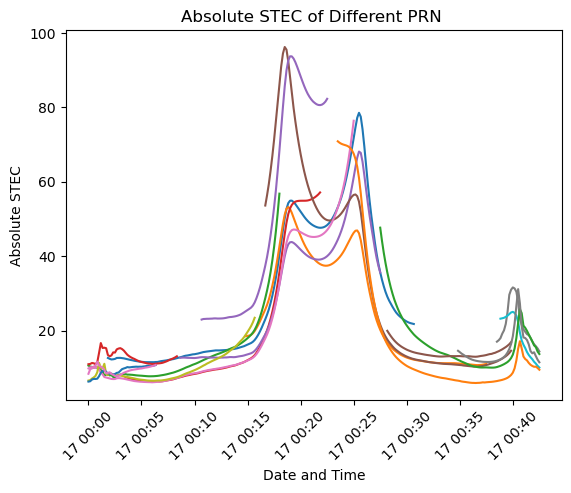

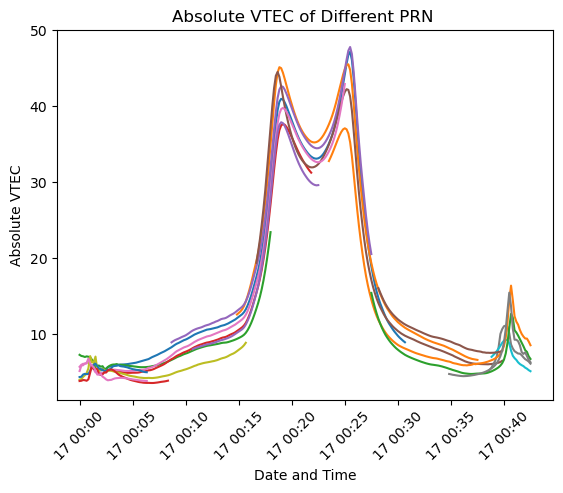

In [5]:
for prn in np.unique(selsd.PRN):

    seld2 = selsd.where(selsd.PRN == prn, drop = True)
    
    plt.plot(seld2.date, seld2.Absolute_STEC)
    plt.xticks(rotation=45)
    plt.xlabel('Date and Time')
    plt.ylabel('Absolute STEC')
    plt.title('Absolute STEC of Different PRN ')

plt.show()


for prn in np.unique(selsd.PRN):

    seld2 = selsd.where(selsd.PRN == prn, drop = True)
    
    plt.plot(seld2.date, seld2.Absolute_VTEC)
    plt.xticks(rotation=45)
    plt.xlabel('Date and Time')
    plt.ylabel('Absolute VTEC')
    plt.title('Absolute VTEC of Different PRN ')

plt.show()

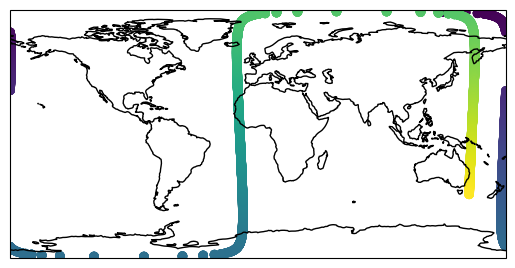

In [6]:
ax = plt.subplot(projection=ccrs.PlateCarree())


ma = 5000

ax.scatter(d1.Longitude.values[:ma], d1.Latitude.values[:ma], c=d1.Timestamp.values[:ma])

ax.coastlines()


In [7]:
d1.data_vars

Data variables:
    Timestamp          (step) float64 6.353e+13 6.353e+13 ... 6.353e+13
    Latitude           (step) float64 88.73 88.73 88.73 ... -57.2 -57.2 -57.2
    Longitude          (step) float64 134.2 134.2 134.2 ... -175.1 -175.1 -175.1
    Radius             (step) float64 6.806e+06 6.806e+06 ... 6.825e+06
    GPS_Position_X     (step) float64 -6.162e+06 -1.878e+07 ... -3.354e+06
    GPS_Position_Y     (step) float64 1.532e+07 -1.001e+06 ... -2.177e+07
    GPS_Position_Z     (step) float64 2.075e+07 1.862e+07 ... -1.507e+07
    LEO_Position_X     (step) float64 -1.049e+05 -1.049e+05 ... -3.683e+06
    LEO_Position_Y     (step) float64 1.079e+05 1.079e+05 ... -3.128e+05
    LEO_Position_Z     (step) float64 6.804e+06 6.804e+06 ... -5.737e+06
    PRN                (step) uint16 5 10 13 16 23 29 5 ... 32 9 11 17 20 28 32
    L1                 (step) float64 2.162e+07 2.215e+07 ... 2.356e+07
    L2                 (step) float64 2.162e+07 2.215e+07 ... 2.356e+07
    P1        

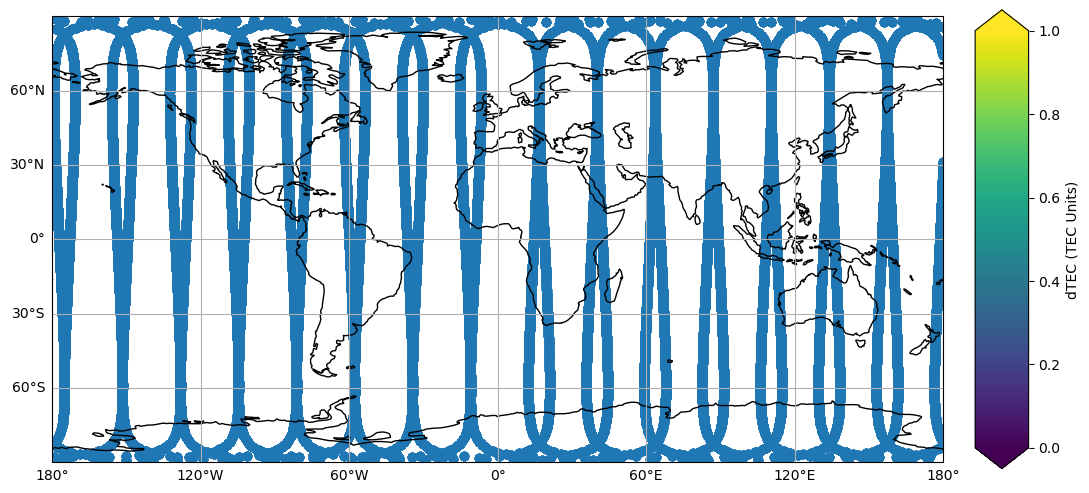

In [8]:

fig, axs = plt.subplots(1, 2, width_ratios=(1,.06), figsize=(11,5), 
                        subplot_kw={'projection':ccrs.PlateCarree()})
# ax0 = fig.add_subplot(1,5,, projection=ccrs.PlateCarree())

axs[1].remove()
axs[1] = fig.add_subplot(1,2,2)


f = axs[0].scatter(d1.Longitude, d1.Latitude)

axs[0].coastlines()
axs[0].gridlines(draw_labels=['bottom', 'left'])

plt.colorbar(f, cax=axs[1], label='dTEC (TEC Units)', extend='both')

# axs[0].ccrs.PlateCarree()

fig.tight_layout()
fig.show();

In [9]:
print(math.degrees(math.atan(1)))

45.0


In [10]:
import ecef_geodetic
import importlib as il

ecef_geodetic = il.reload(ecef_geodetic)

lat_gps = []
lon_gps = []
alt_gps = []

lat_leo = []
lon_leo = []
alt_leo = []

x_geod = []
y_geod = []
z_geod = []

radius_check = []

for x,y,z in tqdm(zip(d1.GPS_Position_X, d1.GPS_Position_Y, d1.GPS_Position_Z)):
    lat, lon, alt = ecef_geodetic.ecef_to_lla(x,y,z)
    lat_gps.append(lat)
    lon_gps.append(lon)
    alt_gps.append(alt)

for x,y,z in tqdm(zip(d1.LEO_Position_X, d1.LEO_Position_Y, d1.LEO_Position_Z)):
    lat, lon, alt = ecef_geodetic.cart_spher(x,y,z)
    lat_leo.append(lat)
    lon_leo.append(lon)
    alt_leo.append(alt)

for lat,lon,h in tqdm(zip(d1.Latitude, d1.Longitude, d1.Radius)):
    x, y, z = ecef_geodetic.spher_cart(lat,lon,h)
    x_geod.append(x)
    y_geod.append(y)
    z_geod.append(z)

d1['GPS_lat'] = ('step', lat_gps, {'step': step})
d1['GPS_lon'] = ('step', lon_gps, {'step': step})
d1['GPS_alt'] = ('step', alt_gps, {'step': step})
d1['LEO_lat'] = ('step', lat_leo, {'step': step})
d1['LEO_lon'] = ('step', lon_leo, {'step': step})
d1['LEO_alt'] = ('step', alt_leo, {'step': step})
d1['Geod_X'] = ('step', x_geod, {'step': step})
d1['Geod_Y'] = ('step', y_geod, {'step': step})
d1['Geod_Z'] = ('step', z_geod, {'step': step})

54985it [00:18, 2964.82it/s]
54985it [01:12, 758.68it/s]
54985it [00:14, 3818.30it/s]


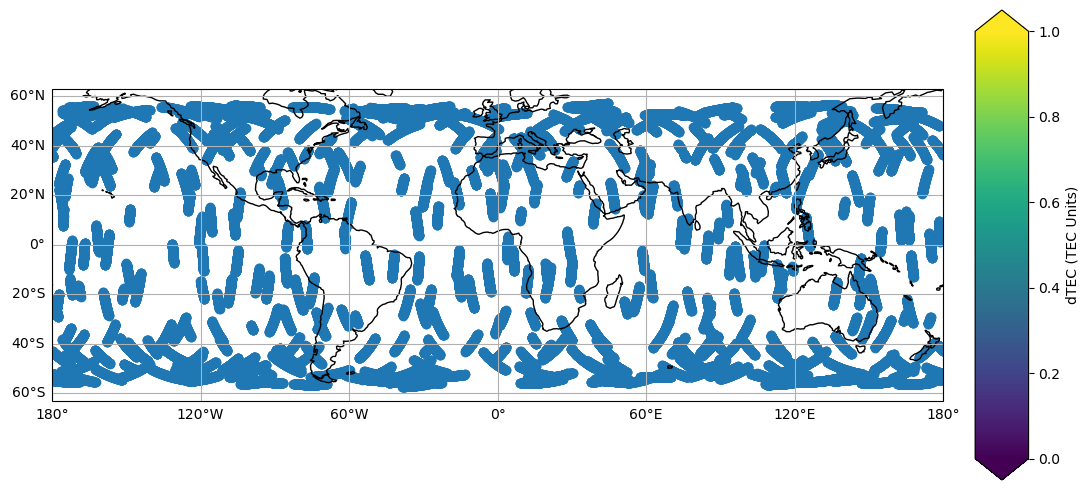

In [11]:

fig, axs = plt.subplots(1, 2, width_ratios=(1,.06), figsize=(11,5), 
                        subplot_kw={'projection':ccrs.PlateCarree()})
# ax0 = fig.add_subplot(1,5,, projection=ccrs.PlateCarree())

axs[1].remove()
axs[1] = fig.add_subplot(1,2,2)


f = axs[0].scatter(d1.GPS_lon, d1.GPS_lat)

axs[0].coastlines()
axs[0].gridlines(draw_labels=['bottom', 'left'])

plt.colorbar(f, cax=axs[1], label='dTEC (TEC Units)', extend='both')

# axs[0].ccrs.PlateCarree()

fig.tight_layout()
fig.show();

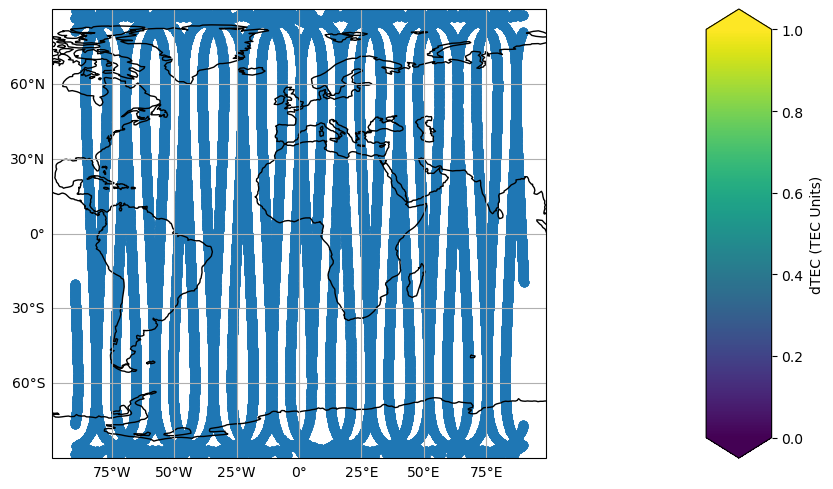

In [12]:

fig, axs = plt.subplots(1, 2, width_ratios=(1,.06), figsize=(11,5), 
                        subplot_kw={'projection':ccrs.PlateCarree()})
# ax0 = fig.add_subplot(1,5,, projection=ccrs.PlateCarree())

axs[1].remove()
axs[1] = fig.add_subplot(1,2,2)


f = axs[0].scatter(d1.LEO_lon, d1.LEO_lat)

axs[0].coastlines()
axs[0].gridlines(draw_labels=['bottom', 'left'])

plt.colorbar(f, cax=axs[1], label='dTEC (TEC Units)', extend='both')

# axs[0].ccrs.PlateCarree()

fig.tight_layout()
fig.show();

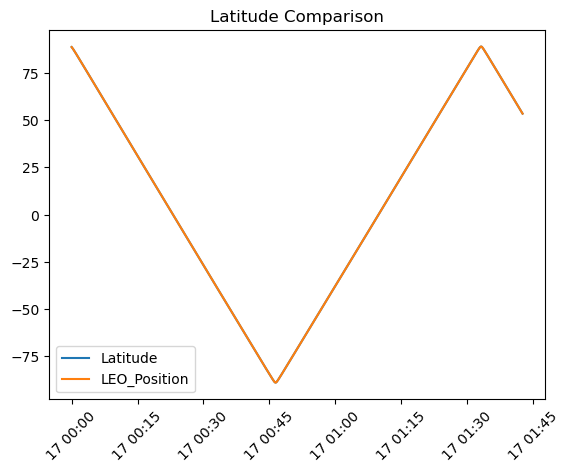

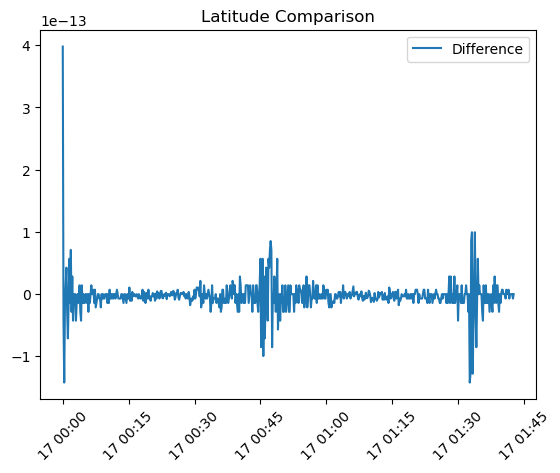

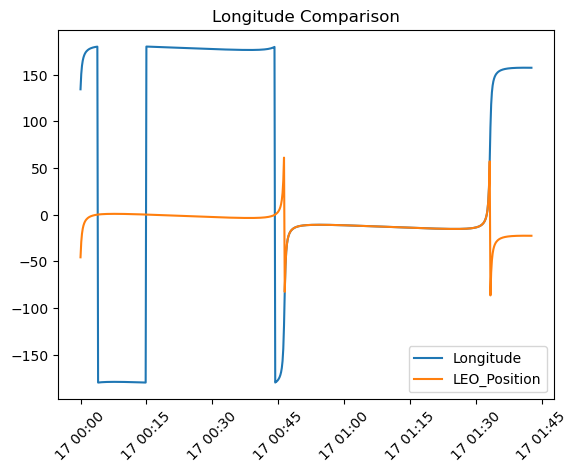

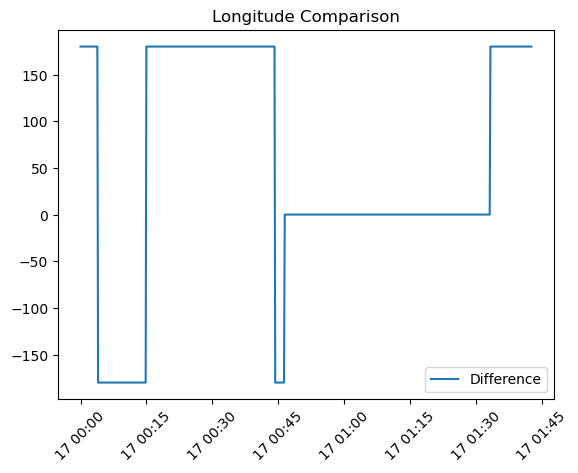

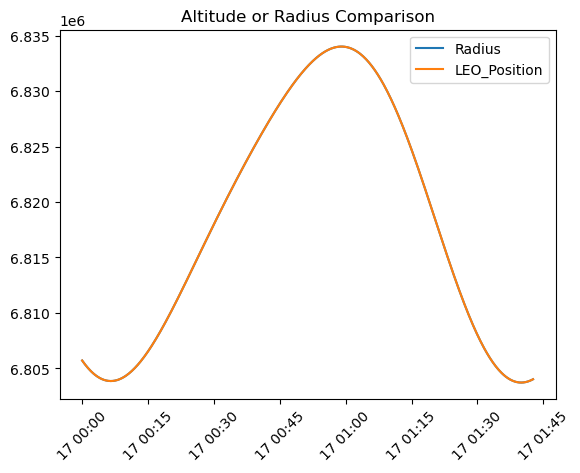

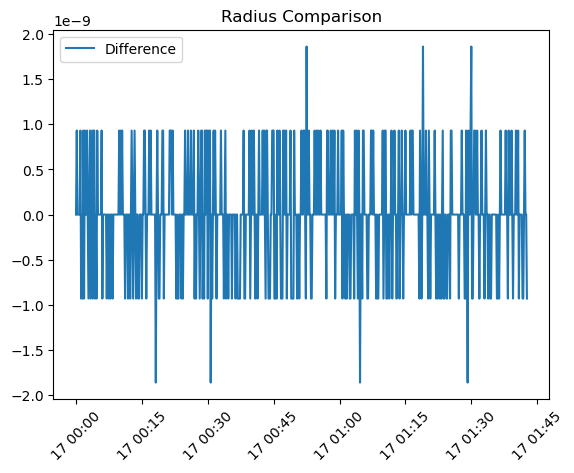

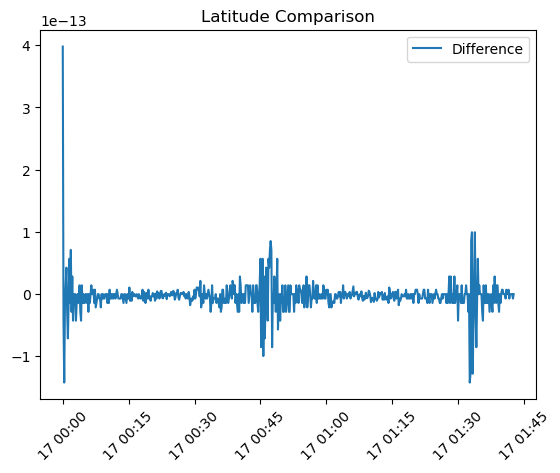

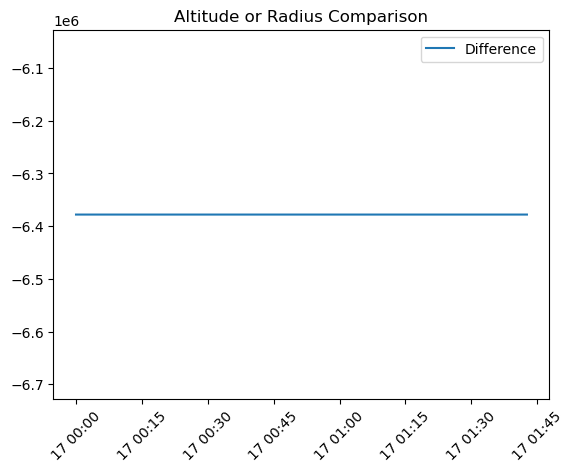

In [15]:
a = 0
b = 4000

plt.figure()
plt.plot(d1.date[a:b], d1.Latitude.values[a:b], label='Latitude')
plt.plot(d1.date[a:b], d1.LEO_lat.values[a:b], label='LEO_Position')
plt.title('Latitude Comparison')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure()
plt.plot(d1.date[a:b], d1.Latitude.values[a:b] - d1.LEO_lat.values[a:b], label='Difference')
plt.title('Latitude Comparison')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure()
plt.plot(d1.date[a:b], d1.Longitude.values[a:b], label='Longitude')
plt.plot(d1.date[a:b], d1.LEO_lon.values[a:b], label='LEO_Position')
plt.title('Longitude Comparison')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure()
plt.plot(d1.date[a:b], d1.Longitude.values[a:b] - d1.LEO_lon.values[a:b], label='Difference')
plt.title('Longitude Comparison')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure()
plt.plot(d1.date[a:b], d1.Radius.values[a:b], label='Radius')
plt.plot(d1.date[a:b], d1.LEO_alt.values[a:b], label='LEO_Position')
plt.title('Altitude or Radius Comparison')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure()
plt.plot(d1.date[a:b], d1.Radius.values[a:b] - d1.LEO_alt.values[a:b], label='Difference')
plt.title('Radius Comparison')
plt.xticks(rotation=45)
plt.legend()
plt.show()



plt.figure()
plt.plot(d1.date[a:b], d1.Latitude.values[a:b] - d1.LEO_lat.values[a:b], label='Difference')
plt.title('Latitude Comparison')
plt.xticks(rotation=45)
plt.legend()
plt.show()


plt.figure()
plt.plot(d1.date[a:b], d1.Radius.values[a:b] - (d1.LEO_alt.values[a:b] + 6378000), label='Difference')
plt.title('Altitude or Radius Comparison')
plt.xticks(rotation=45)
plt.legend()
plt.show()

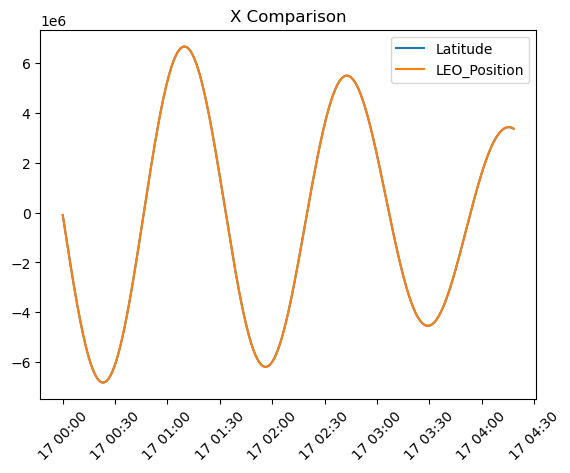

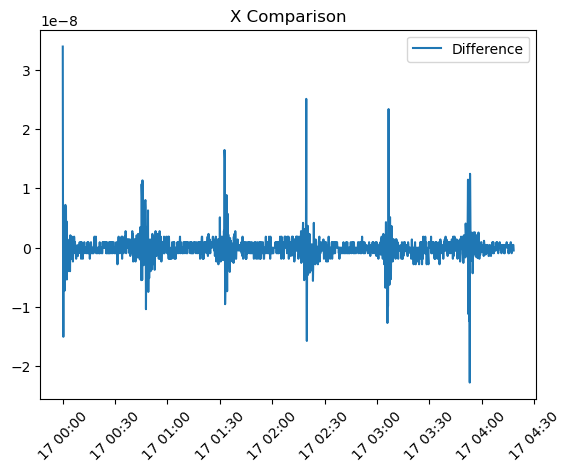

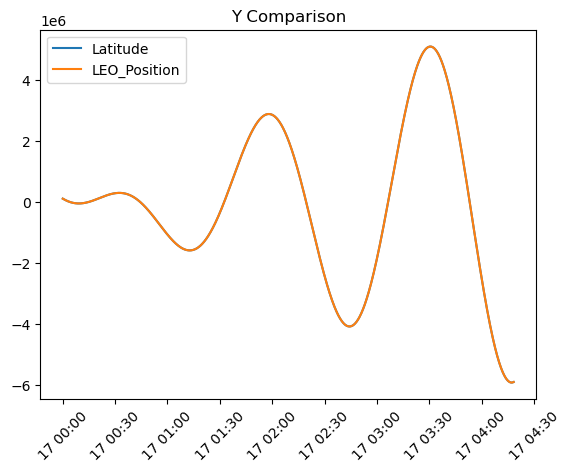

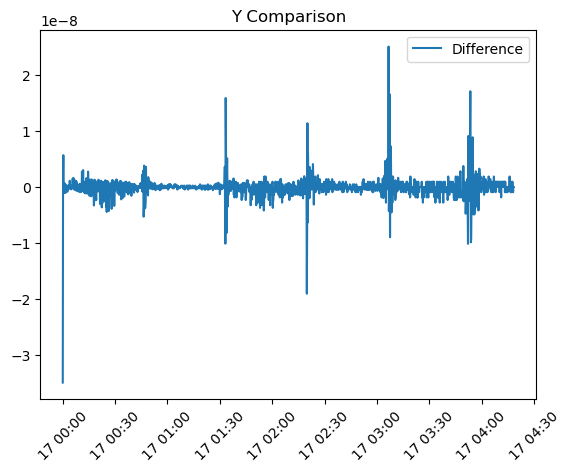

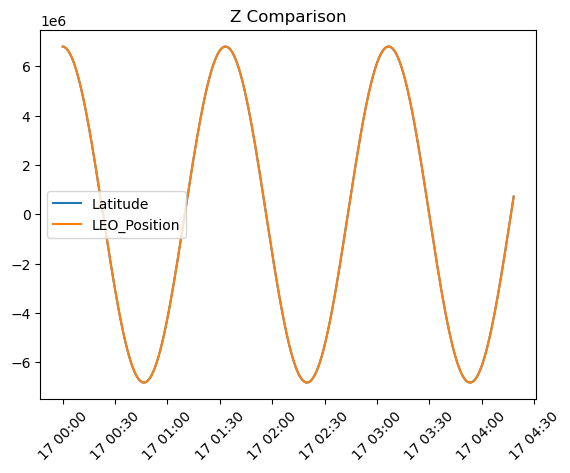

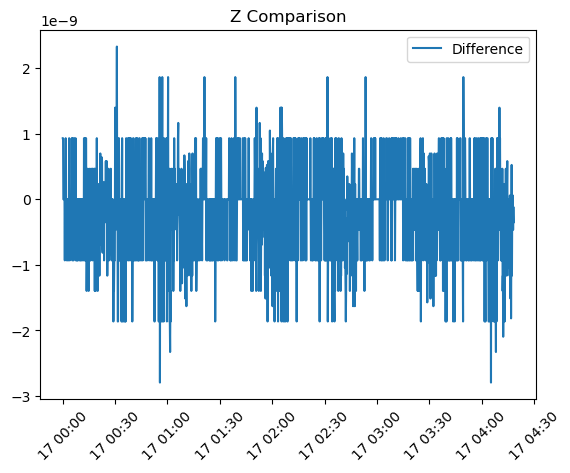

In [17]:
a = 0
b = 10000

plt.figure()
plt.plot(d1.date[a:b], d1.Geod_X.values[a:b], label='Latitude')
plt.plot(d1.date[a:b], d1.LEO_Position_X.values[a:b], label='LEO_Position')
plt.title('X Comparison')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure()
plt.plot(d1.date[a:b], d1.Geod_X.values[a:b] - d1.LEO_Position_X.values[a:b], label='Difference')
plt.title('X Comparison')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure()
plt.plot(d1.date[a:b], d1.Geod_Y.values[a:b], label='Latitude')
plt.plot(d1.date[a:b], d1.LEO_Position_Y.values[a:b], label='LEO_Position')
plt.title('Y Comparison')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure()
plt.plot(d1.date[a:b], d1.Geod_Y.values[a:b] - d1.LEO_Position_Y.values[a:b], label='Difference')
plt.title('Y Comparison')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure()
plt.plot(d1.date[a:b], d1.Geod_Z.values[a:b], label='Latitude')
plt.plot(d1.date[a:b], d1.LEO_Position_Z.values[a:b], label='LEO_Position')
plt.title('Z Comparison')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure()
plt.plot(d1.date[a:b], d1.Geod_Z.values[a:b] - d1.LEO_Position_Z.values[a:b], label='Difference')
plt.title('Z Comparison')
plt.xticks(rotation=45)
plt.legend()
plt.show()

'''
plt.figure()
plt.plot(d1.date[a:b], d1.Radius[a:b], label='Radius Given')
plt.plot(d1.date[a:b], d1.Radius_check[a:b], label='Radius Calculated')
plt.title('Radius Comparison')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure()
plt.plot(d1.date[a:b], d1.Radius[a:b] - d1.Radius_check[a:b], label='Difference')
plt.title('Radius Comparison')
plt.xticks(rotation=45)
plt.legend()
plt.show()
''';

In [18]:
y = np.array([1,2,3,9,15,16,17,18,19,20,31,32,33,44,105])
split = np.where(np.diff(y) > 3)
print(split)
for s in split:
    print(y[s])


sel = np.where(np.diff(y) > 2)
print(len(sel[0]), sel)
yn = np.split(y, sel[0]+1)
print(yn)

(array([ 2,  3,  9, 12, 13]),)
[ 3  9 20 33 44]
5 (array([ 2,  3,  9, 12, 13]),)
[array([1, 2, 3]), array([9]), array([15, 16, 17, 18, 19, 20]), array([31, 32, 33]), array([44]), array([105])]


In [19]:
dn = d1.groupby('PRN') # 1, 24, 27 PRN is not present in grace_data[0]
prn = np.unique(d1.PRN)

print(dn)
print()

# All the timestamps are at the gap of 10 seconds
print(np.unique(d1.date.dt.time.values)[:10])

r = d1.date[:10]
print(r)
splits = np.where(np.diff(r.dt.second.values) > 5)
print(splits)

DatasetGroupBy, grouped over 'PRN'
29 groups with labels 2, 3, 4, 5, 6, 7, ..., 28, 29, 30, 31, 32.

[datetime.time(0, 0) datetime.time(0, 0, 10) datetime.time(0, 0, 20)
 datetime.time(0, 0, 30) datetime.time(0, 0, 40) datetime.time(0, 0, 50)
 datetime.time(0, 1) datetime.time(0, 1, 10) datetime.time(0, 1, 20)
 datetime.time(0, 1, 30)]
<xarray.DataArray 'date' (step: 10)>
array(['2013-03-17T00:00:00.000000000', '2013-03-17T00:00:00.000000000',
       '2013-03-17T00:00:00.000000000', '2013-03-17T00:00:00.000000000',
       '2013-03-17T00:00:00.000000000', '2013-03-17T00:00:00.000000000',
       '2013-03-17T00:00:10.000000000', '2013-03-17T00:00:10.000000000',
       '2013-03-17T00:00:10.000000000', '2013-03-17T00:00:10.000000000'],
      dtype='datetime64[ns]')
Dimensions without coordinates: step
Attributes:
    step:     range(0, 54985)
(array([5]),)


In [131]:
#print(len(np.unique((d1.LEO_Position_X.values))))
#print(len(np.unique((d1.LEO_Position_Y.values))))
#print(len(np.unique((d1.LEO_Position_Z.values))))

# first finding it for just one pass = 1600
d2 = d1.where(d1.Timestamp <= d1.Timestamp.values[8000], drop=True) 
print(np.unique(d2.PRN))

# 1600 is the number of points in one pass
xout = pd.date_range(d2.date.min().values, d2.date.max().values, 28800)
print(xout[0], xout[-1])

out_time = []
out_lat = []
out_lon = []
out_stec = []
out_sdtec = []
out_vtec = []
#out_vdtec = []

skipped=0
skip = False 

    
d3 = list(d2.groupby('PRN'))

for sat_num, d5 in d3:
    print('start')
    first = True
    #print(d5.date.values)
    splits = np.where(np.diff((60*d5.date.dt.hour.values) + (d5.date.dt.minute.values) ) > 1) # Split if there is a break of more than 5 minutes
    print(splits)

    for s in splits:
        print('split')
        data = {}

        for v in d5.data_vars:
            if v == 'DCB' or v == 'DCB_Error':
                continue
            data[v] = np.split(d5[v].values, s+1) # this is the culprit
        #print(data['Absolute_STEC'][0])
            
        for ipass in range(len(data['Absolute_STEC'])):
            
            sel = np.where(data['Absolute_STEC'][ipass] > 1)

            if len(sel[0]) > 20:
                xin = data['date'][ipass][sel]
                num_secs = pd.Timedelta(xin[-1] - xin[0]).total_seconds()

                if num_secs > 600: 
                    # So at least 10 min of data should be there in each segment
                    yin = data['Absolute_STEC'][ipass][sel]
                    print('Sat_num', int(sat_num))
                    print(int(num_secs/60), 'min')
                    
                    _,in_indx = np.unique(xin,return_index=True)
                    if len(in_indx) != len(xin):
                        skip = True
                        skipped += 1
                        continue
                    
                    
                    yout = CubicSpline(xin, yin)(xout, extrapolate=False)
                    #print(xin, xout)
                    x_out = []
                    y_out = []
                    
                    for i in range(len(yout)):
                        if not np.isnan(yout[i]):
                            x_out.append(np.datetime64(xout[i]))
                            y_out.append(yout[i])
                    
                    out_time.append(x_out)
                    out_stec.append(y_out)
                    
                    fit = np.empty(len(y_out))
                    fit = savgol_filter(y_out, 60, 1, mode='interp')
                    out_sdtec.append(y_out - fit)
                    
                    out_lat.append(CubicSpline(xin, data['Latitude'][ipass][sel])(x_out))
                    out_lon.append(CubicSpline(xin, data['Longitude'][ipass][sel])(x_out))
                    #out_time.append(CubicSpline(xin, data['date'][ipass][sel])(x_out, extrapolate=False))
                    out_vtec.append(CubicSpline(xin, data['Absolute_VTEC'][ipass][sel])(x_out))
                    
                    #out_vdtec.append(CubicSpline(xin, data['los_tec'][ipass][sel])(xout, extrapolate=False))
                    
                else:
                    skipped += 1
                    
            else:
                skipped += 1
                    

print(skipped, 'skipped')

[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.
 20. 21. 22. 23. 25. 26. 28. 29. 30. 31. 32.]
2013-03-17 00:00:00 2013-03-17 03:29:00
start
(array([173]),)
split
Sat_num 2
28 min
Sat_num 2
28 min
start
(array([116]),)
split
Sat_num 3
19 min
Sat_num 3
29 min
start
(array([136]),)
split
Sat_num 4
22 min
Sat_num 4
30 min
start
(array([108, 242]),)
split
Sat_num 5
18 min
Sat_num 5
22 min
start
(array([161]),)
split
Sat_num 6
26 min
Sat_num 6
20 min
start
(array([110, 259]),)
split
Sat_num 7
18 min
Sat_num 7
24 min
Sat_num 7
15 min
start
(array([113, 255]),)
split
Sat_num 8
18 min
Sat_num 8
23 min
Sat_num 8
20 min
start
(array([139, 277]),)
split
Sat_num 9
23 min
Sat_num 9
22 min
Sat_num 9
19 min
start
(array([150]),)
split
Sat_num 10
25 min
Sat_num 10
27 min
start
(array([155]),)
split
Sat_num 11
25 min
Sat_num 11
29 min
start
(array([125, 264]),)
split
Sat_num 12
20 min
Sat_num 12
23 min
start
(array([94]),)
split
Sat_num 13
15 min
start
(array([], dtype=int64),)


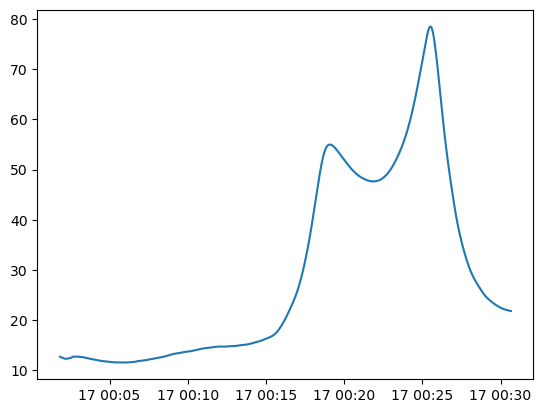

In [134]:
#print(out_stec[0])
#print(out_sdtec[0])

plt.figure()
plt.plot(out_time[0],out_stec[0])
plt.show()

In [86]:
print(d1.date.dt.time.values[:10])

print(d1.data_vars)

[datetime.time(0, 0) datetime.time(0, 0) datetime.time(0, 0)
 datetime.time(0, 0) datetime.time(0, 0) datetime.time(0, 0)
 datetime.time(0, 0, 10) datetime.time(0, 0, 10) datetime.time(0, 0, 10)
 datetime.time(0, 0, 10)]
Data variables:
    Timestamp          (step) float64 6.353e+13 6.353e+13 ... 6.353e+13
    Latitude           (step) float64 88.73 88.73 88.73 ... -57.2 -57.2 -57.2
    Longitude          (step) float64 134.2 134.2 134.2 ... -175.1 -175.1 -175.1
    Radius             (step) float64 6.806e+06 6.806e+06 ... 6.825e+06
    GPS_Position_X     (step) float64 -6.162e+06 -1.878e+07 ... -3.354e+06
    GPS_Position_Y     (step) float64 1.532e+07 -1.001e+06 ... -2.177e+07
    GPS_Position_Z     (step) float64 2.075e+07 1.862e+07 ... -1.507e+07
    LEO_Position_X     (step) float64 -1.049e+05 -1.049e+05 ... -3.683e+06
    LEO_Position_Y     (step) float64 1.079e+05 1.079e+05 ... -3.128e+05
    LEO_Position_Z     (step) float64 6.804e+06 6.804e+06 ... -5.737e+06
    PRN          